## Stabilizer formalism

Instead of keeping track of a $2^n$ size array describing the state of the system, we can, for a certain class of circuits called Clifford circuits, use $n$ stabilizer operators to describe our system, and so only have to store $n \times 2n$ values. This is possible since we can find $n$ stabilizers that uniquely determine the state of the system (and thus are the generators for the group $S$ that stabilizes the system). Importantly, these generators are a subset of the $n$ qubit Pauli group $G_n$, which is constructed from all possible tensor product combinations of $n$ operators from the single qubit Pauli group $G_1 = \{\pm I, \pm i I, \pm X, \pm i X, \pm Y, \pm i Y, \pm Z, \pm i Z \}$.

An operator $U$ stabilizes $|\psi\rangle$ iff
$$ U |\psi\rangle = |\psi\rangle $$

And so we see that the typically chosen initial state $|0\rangle$ of a single qubit has the stabilizer $Z$ since

$ Z |0\rangle = |0\rangle $

We also see that if both $U_1$ and $U_2$ stabilize $|\psi\rangle$, then

$$ |\psi\rangle = (1-\alpha)|\psi\rangle + \alpha|\psi\rangle = (1-\alpha)U_1|\psi\rangle + \alpha U_2|\psi\rangle = \left((1-\alpha)U_1 + \alpha U_2\right)|\psi\rangle$$

So $(1-\alpha)U_1 + \alpha U_2$ also stabilizes the system.

For a $n$ qubit system $|\psi\rangle = |0\rangle^{\otimes n}$ we have the $n$ stabilizers $Z_1 \equiv Z_1 \otimes I_2 \otimes I_3 \otimes ... \otimes I_n$, $Z_2 \equiv I_1 \otimes Z_2 \otimes I_3 \otimes ... \otimes I_n$, etc...

From now on I will try to refer to the stabilizers we store in our code as the "generators". 

### Evolving the stabilizers

So we know that we can encode the state by keeping track of $n$ generators, and following the typical procedure of starting our circuit in state $|\psi\rangle = |0\rangle^{\otimes n}$, we know that our initial generators are $n$ operators $Z_i$ working on qubit $i$ respectively. The first question then is how do we evolve these generators as we add gates to the circuit?

Assume we add the gate $U$, then the system is described by the state
$$ |\psi'\rangle = U |\psi\rangle $$
so we must now find the $n$ generators that stabilize $|\psi'\rangle$. Our previous state was stabilised by the $n$ generators $g$, such that $ g |\psi\rangle = |\psi\rangle $, therefore
$$ U |\psi\rangle = U g |\psi\rangle = (U g U^\dagger) U |\psi\rangle $$
and so $U g U^\dagger$ stabilizes the new state $ U |\psi\rangle $.

Take f.ex a Hadamard gate on the $j$'th qubit of an initial $n$ qubit system $|0\rangle^{\otimes n}$, then the generator $g_j = Z_j \rightarrow H Z_j H^\dagger = X_j$, while the other generators are left unchanged. For Hadamard, S, CNOT, X, Y and Z gates, outputs for given input stabilizers can be found in table 10.7 of page 460 in "Quantum computation and information" by Nielsen and Chuang. Of special interest is that these gates map elements of the subset $\{ I, X, Y, Z\}$ to another element of this subset (see table). We will see later in the function `rowsum(h,j)` that it is usefull to know that the prefactor to the stabilizers will allways remain real under addition of new Clifford gates when we start from a state of only $Z$ operators.

<table style="width:30%">
  <tr>
    <th>Operation</th>
    <th>Input</th>
    <th>Output</th>
  </tr>
  <tr>
    <td rowspan="2">$H$</td>
    <td>$X$</td>
    <td>$Z$</td>
  </tr>
  <tr>
    <td>$Z$</td>
    <td>$X$</td>
  </tr>
  <tr>
    <td rowspan="2">$S$</td>
    <td>$X$</td>
    <td>$Y$</td>
  </tr>
  <tr>
    <td>$Z$</td>
    <td>$Z$</td>
  </tr>
  <tr>
    <td rowspan="2">$X$</td>
    <td>$X$</td>
    <td>$X$</td>
  </tr>
  <tr>
    <td>$Z$</td>
    <td>$-Z$</td>
  </tr>
  <tr>
    <td rowspan="2">$Y$</td>
    <td>$X$</td>
    <td>$-X$</td>
  </tr>
  <tr>
    <td>$Z$</td>
    <td>$-Z$</td>
  </tr>
  <tr>
    <td rowspan="2">$Z$</td>
    <td>$X$</td>
    <td>$-X$</td>
  </tr>
  <tr>
    <td>$Z$</td>
    <td>$Z$</td>
  </tr>
  <tr>
    <td rowspan="4">CNOT</td>
    <td>$X_1$</td>
    <td>$X_1 X_2$</td>
  </tr>
  <tr>
    <td>$X_2$</td>
    <td>$X_2$</td>
  </tr>
  <tr>
    <td>$Z_1$</td>
    <td>$Z_1$</td>
  </tr>
  <tr>
    <td>$Z_2$</td>
    <td>$Z_1 Z_2$</td>
  </tr>
</table>

### Encoding the generators

We only need operators $I_j$, $X_j$, $Y_j$ and $Z_j$ to describe any generator, and need to store $n$ generators consisting of $n$ single qubit operators. Furthermore, we can express $Y_j=iX_jZ_j$. Thus the check matrix is a good way to encode the generators, ie. we keep track of the existence of $X_j$ and $Z_j$ in qubit number $j$'s operator of the generator $g^{(i)}$. We also have to keep track of the sign of $g^{(i)}$. The check matrix looks like follows:

$$
\begin{pmatrix} p^{(1)} \\ p^{(2)} \\ \vdots \\ p^{(n)} \end{pmatrix} =
\left(
\begin{array}{c|c} \begin{array}{} x_{11} & \dots & x_{1n} \\ x_{21} & \dots & x_{2n} \\ \vdots & \ddots & \vdots \\ x_{n1} & \dots & x_{nn} \end{array} & \begin{array}{} z_{11} & \dots & z_{1n} \\ z_{21} & \dots & z_{2n} \\ \vdots & \ddots & \vdots \\ z_{n1} & \dots & z_{nn} \end{array} \end{array}
\right)
$$

Each row corresponds to a generator. So the single qubit operator on qubit $j$ in generator $g^{(i)}$ is: $I$ if $x_{ij} = z_{ij} = 0$, $X$ if $x_{ij} = 1$ and $z_{ij} = 0$, $Z$ if $x_{ij} = 0$ and $z_{ij} = 1$, $Y$ if $x_{ij} = z_{ij} = 1$. It can be easily seen that the inital matrix for the $|0\rangle^{\otimes n}$ state is $(0|I)$.

### Measuring a qubit
Measuring the $a$'th qubit **in the computational basis** corresponds to applying the operator $Z_a$ to our system. We then project the qubit onto either $|0\rangle$ or $|1\rangle$. There are two possibilities:

- All generators commute with $Z_a$, ie. there is no $X_a$ single qubit operator in any of the generators $g$.
- One or more generators anti-commute with $Z_a$, ie. there is a $X_a$ single qubit operator in one or more of the generators $g$. But if $g^{(q)}$ and $g^{(j)}$ both anti-commute with $Z_a$, then $g^{(q)} g^{(j)}$ commutes with $Z_a$, and we can replace $g^{(j)}$ with $g^{(q)} g^{(j)}$ which is also a generator for the group that stabilizes $|\psi\rangle$. So without loss of generality, we can allways choose a set of generators such that only one of them anti-commutes with a given Pauli operator.

In the first case $Z_a |\psi\rangle = Z_a g|\psi\rangle = g Z_a |\psi\rangle$, so the generators $g$ stabilize $Z_a |\psi\rangle$ and the system remains unchanged by the measurement. The $a$'th qubit is in a predetermined eigenstate of $Z_a$, we just need to find out if the eigenvalue is $+1$ (ie. $|0\rangle$) or $-1$ (ie. $|1\rangle$). The task is essentially to find which of $Z_a$ and $-Z_a$ is in the subgroup $S$. An effective way to determine this is presented later.

In the second case it can be shown (see proof below) that there is a 50% probability of measuring either +1 or -1. Assuming $Z_a$ anti-commutes with $g^{(q)}$, we replace all other generators $g^{(j)}$ that anti-commute with $Z_a$ with $g^{(q)} g^{(j)}$ so that all generators except $g^{(q)}$ now commute with $Z_a$. Since the measurement forces qubit $a$ to either state $|0\rangle$ or $|1\rangle$ we must replace $g^{(q)}$ with $Z_a$ if we measure $+1$ and $-Z_a$ if we measure $-1$, since we know that $Z_a$ or $-Z_a$ now must stabilize the system after the measurement.

##### Proof of measurement probablility for case 2
Since the eigenvalues of the operators $\pm Z_a$ are $\pm 1$, their projectors are $(I \pm Z_a)/2$. Thus the measurement probabilities are
$$p(+1) = \text{tr}\left(\frac{I+Z_a}{2} |\psi\rangle \langle\psi|\right)$$
$$p(-1) = \text{tr}\left(\frac{I-Z_a}{2} |\psi\rangle \langle\psi|\right)$$

Since $Z_a$ anti-commutes with $g^{(q)}$ we have $Z_a g^{(q)} = -g^{(q)} Z_a$. Also, we have $g^{(q)} |\psi\rangle = |\psi\rangle$. So

$$p(+1) = \text{tr}\left(\frac{I+Z_a}{2} |\psi\rangle \langle\psi|\right) = \text{tr}\left(\frac{I+Z_a}{2} g^{(q)} |\psi\rangle \langle\psi|\right) = \text{tr}\left(g^{(q)} \frac{I-Z_a}{2} |\psi\rangle \langle\psi|\right)$$

Now using that the trace operation is invariant under cyclic permutations ($\text{tr}(AB)=\text{tr}(BA)$) we find that

$$p(+1) = \text{tr}\left(g^{(q)} \frac{I-Z_a}{2} |\psi\rangle \langle\psi|\right) = \text{tr}\left(\frac{I-Z_a}{2} |\psi\rangle \langle\psi|g^{(q)}\right) = \text{tr}\left(\frac{I-Z_a}{2} |\psi\rangle \langle\psi|\right) = p(-1) $$

Where we have used the fact that $g^{(q)}$ is hermitian in the last step ($g^{(q)}=g^{(q)\dagger}$). Since $p(+1)+p(-1)=1$ we find that $p(+1)=p(-1)=0.5$.

## Tableau algorithm

The entirety of the algorithm is contained in the `Circuit` class. An external helper function `XOR(a,b)` is included to simplify the code.

#### The `Circuit.__init__(filename)` function
The circuit is built by loading an instruction set from the file `filename`.txt. This file must have the following syntax:

```
N number of qubits

Gate1 Qubit/Control [Target]
Gate2 Qubit/Control [Target]
.
.
.
```
Here `N` should be replaced by an integer denoting the number of qubits. `Gate1` is replaced by a letter denoting the type of the first gate (f.ex H for Hadamard), `Gate2` is the type of the second gate etc. `Qubit/Control` is replaced by the number of the qubit the a single qubit acts on, and in the case of a 2 qubit gate it is the number of the control qubit. `[Target]` is replaced by the number of the target qubit if the gate is a 2 qubit gate (otherwise left blank). Note that the qubit numbering i zero indexed in practice, while for any mathematics shown in the documentation I take the liberty to use indexing from 1.

In this function we also declare and initialise the `self.tableau` variable, which is at the heart of the algorithm and keeps track of the generators (with some additional features). It is constructed as two check-matrices on top of each other with an additional column and an additional row (the check matrix is described in a section above). The (n+1)'th to (2n)'th rows each encode a generator, with the (2n+1)'th element of each row denoting the given generator's sign. The 1'st to n'th rows each encode a "destabilizer" operator which are defined such that the 1'st to (2n)'th rows together generate $G_n$ ignoring the phase prefactor. Note that the only reason we include these "destabilizers" is to efficiently determine which of $\pm Z_a$ is in $S$ for the case of deterministic measurement. It is also for the deterministic measurement that we include the (2n+1)'th row, which is only used as scratch space. The matrix `self.tableau` looks like following:


$$
\left(
\begin{array}{c|c} 
\begin{array}{} x_{11} & \dots & x_{1n} \\ x_{21} & \dots & x_{2n} \\ \vdots & \ddots & \vdots \\ x_{n1} & \dots & x_{nn} \\ \hline x_{(n+1)1} & \dots & x_{(n+1)n}  \\ \vdots & \ddots & \vdots \\ x_{(2n)1} & \dots & x_{(2n)n} \\ \hline x_{(2n+1)1} & \dots & x_{(2n+1)n} \end{array} & \begin{array}{} z_{11} & \dots & z_{1n} \\ z_{21} & \dots & z_{2n} \\ \vdots & \ddots & \vdots \\ z_{n1} & \dots & z_{nn} \\ \hline z_{(n+1)1} & \dots & z_{(n+1)n} \\ \vdots & \ddots & \vdots \\ z_{(2n)1} & \dots & z_{(2n)n} \\ \hline z_{(2n+1)1} & \dots & z_{(2n+1)n} \end{array} & \begin{array}{} r_1 \\ r_2 \\ \vdots \\ r_n \\ r_{n+1} \\ \vdots \\  r_{2n} \\ r_{2n+1} \end{array} \end{array}
\right)
$$


#### The `Circuit.apply_Hadamard_gate(a)` function

Applies a Hadamard gate to qubit `a`. Referencing the table for how the generators change under a Hadamard operation, we see that we must swap the values of $x_{ja}$ and $z_{ja}$ for $j \in {1,...,2n}$ in `self.tableau`. For the sign, the update rule becomes $r_j \leftarrow r_j \otimes x_{ja} \cdot z_{ja}$ for $j \in {1,...,2n}$. Here $\otimes$ denotes the XOR-operation.

#### The `Circuit.apply_S_gate(a)` function

Applies a S-gate to qubit `a`. Referencing the table for how the generators change under an S-operation, we see that the update rule becomes $z_{ja} \leftarrow z_{ja} \otimes x_{ja}$ for $j \in {1,...,2n}$ in `self.tableau`. For the sign, the update rule becomes $r_j \leftarrow r_j \otimes x_{ja} \cdot z_{ja}$ for $j \in {1,...,2n}$. Here $\otimes$ denotes the XOR-operation.

#### The `Circuit.apply_CNOT_gate(a,b)` function

Applies a CNOT-gate to control qubit `a` and target qubit `b`. Referencing the table for how the generators change under a CNOT operation, we see that the update rules becomes $x_{jb} \leftarrow x_{jb} \otimes x_{ja}$ and $z_{ja} \leftarrow z_{ja} \otimes z_{jb}$ for $j \in {1,...,2n}$ in `self.tableau`. For the sign, the update rule becomes $r_j \leftarrow r_j \otimes x_{ja} \cdot z_{jb} \cdot (x_{jb} \otimes z_{ja} \otimes 1)$ for $j \in {1,...,2n}$. Here $\otimes$ denotes the XOR-operation.

#### The `Circuit.simulate_circuit()` function
Calls `Circuit.apply_Hadamard_gate(a)`, `Circuit.apply_S_gate(a)` and `Circuit.apply_CNOT_gate(a,b)` according to the instruction set given by `filename`.txt in order to build the circuit and propagate the wavefunction.

#### The `Circuit.rowsum(h,j)` function

This function aims to implement the replacement of generator $g^{(h)}$ with $g^{(h)} g^{(j)}$. 

Consider the single qubit operator in $g^{(h)}$ and $g^{(j)}$ on qubit $k$, which can be: $$I_k = X_k X_k = Z_k Z_k$$ $$X_k$$ $$Y_k = i X_k Z_k$$ $$Z_k$$

We now see how they transform such that $x_{hk} \leftarrow x_{hk} \otimes x_{jk}$ and $z_{hk} \leftarrow z_{hk} \otimes z_{jk}$. Here $\otimes$ denotes the XOR-operation. A few examples are

- $I_k^{(h)} I_k^{(j)}$ s.t $x_{hk}=z_{hk}=x_{jk}=z_{jk} = 0$ thus $x_{hk} \otimes x_{jk} = z_{hk} \otimes z_{jk} = 0$ and so $I_k^{(h)} I_k^{(j)} = I$
- $X_k^{(h)} Z_k^{(j)}$ s.t $x_{hk}=z_{jk} = 1 $ $ x_{jk}=z_{hk} = 0$ thus $x_{hk} \otimes x_{jk} = z_{hk} \otimes z_{jk} = 1$ and so $X_k^{(h)} Z_k^{(j)} = -iY$
- $Y_k^{(h)} X_k^{(j)}$ s.t $x_{hk}=z_{hk}=x_{jk} = 0 $ and $z_{jk} = 0$ thus $x_{hk} \otimes x_{jk} = 0 $ and $ z_{hk} \otimes z_{jk} = 1$ and so $Y_k^{(h)} X_k^{(j)} = -iZ$

One can check that all other combinations also satisfy this relation (in particular it is easy to see that two similar operators will generate $I$).

We must also keep track of the total sign of the new generator. For each single qubit operator multiplication we can get a factor $1 = i^0$ if the two operators are equal or one is $I$. Otherwise we get $i = i^1$ or $-i = i^{-1}$ according to the cyclic rule of the $X$, $Y$, $Z$ operators. We thus see that the factor from one such multiplication is given by:
$$ g(x_a, z_a, x_b, z_b) = \begin{cases}
0 & \text{if } x_a=z_a=0,\\
z_b - x_b  & \text{if } x_a=z_a=1 ,\\
z_b(2x_b - 1)  & \text{if } x_a = 1 \text{ and } z_a = 0,\\
x_b(1 - 2x_b)  & \text{if } x_a = 0 \text{ and } z_a = 1
\end{cases} $$

Summing over the $n$ operator multiplications we get
$$\sum_{k=1}^{n} g(x_{jk}, z_{jk}, x_{hk}, z_{hk})$$
and since we know that our factor will be a real number, this sum must be divisible by 2 or 4, giving a contribution to the total factor of -1 or +1 respectively. Also, the signs of $r_h$ and $r_j$ the generators $g_h$ and $g_j$ must be accounted for. The sign for the new generator is then given by
$$ r_h \leftarrow \frac{ \left( 2r_h + 2r_j + \sum_{k=1}^{n} g(x_{jk}, z_{jk}, x_{hk}, z_{hk}) \right) \mod{4}}{2} $$


#### The `Circuit.measure_qubit(a)` function

The function first determines if the measurment will be random or deterministic by checking if $Z_a$ commutes with all generators or not. This is achieved by checking if any of the values $x_{ja} = 1$ for $j \in {n+1, ..., 2n}$. We use `q` to store the number of the first generator we find that anti-commutes with $Z_a$.

**For the case of random measurement:**
Firstly, for all $j \in {n+1, ..., 2n}$ we transform all other generators that anti-commute (ie. have $x_{ja} = 1$) with $Z_a$ except $g_q$ into generators that commute with $Z_a$ by applying `rowsum(j, q)`. Since our measurment will change the wavefunction by projecting qubit $a$ onto either $|0\rangle$ or $|1\rangle$, we set the entire q'th row equal to zero and then set $z_{qa} \leftarrow 1$ and $r_q$ to either 0 or 1 with equal probability. Now $Z_a$ or $-Z_a$ is a stabilizer according to the measurment result $r_q$, as it should be. However, in order for the rows of `self.tableau` to still generate $G_n$ we must add the simple step $g_{q-n} \leftarrow g_q$ before doing any changes to the q'th row in the previous step. Lastly, the measurment result $r_q$ is returned.

**For the case of deterministic measurement:**
As discussed in an earlier section, the task for the deterministic measurment is to find which of $\pm Z_a$ is in the subgroup of stabilizers $S$. This time, the measurment will not change the state of the system, and so we perform all calculations on our scratch space (the last row of `self.tableau`). We now introduce the notation $R_i$ to be the operator described by the i'th row of `self.tableau`. For the following method we will need some more theory, namely that the following propositions are invariant under the tableau algorithm:

- $R_{n+1},\, ...,\, R_{2n}$ generate $S$, and $R_{1},\, ...,\, R_{2n}$ generate $G_n$.
- $R_{1},\, ...,\, R_{n}$ commute.
- $\forall \, h \in \{1, ..., n\}$ $R_h$ anti-commutes with $R_{n+h}$.
- $\forall \, h, \, i \in \{1, ..., n\}$ so $h \neq i$, $R_i$ commutes with $R_{n+h}$

We also introduce the *symplectic inner product* $R_h \cdot r_i = x_{h1}z_{i1} \otimes ... \otimes x_{hn}z_{in} \otimes x_{i1}z_{h1} \otimes ... \otimes x_{in}z_{hn}$, which is 0 if $R_h$ and $R_i$ commute and 1 if $R_h$ and $R_i$ anti-commute.
We also define $R_h + R_i$ to be the mathematical notation for the `rowsum(h,i)` operation.
We know that we can generate either $Z_a$ or $-Z_a$ from the generators in `self.tableau` by
$$ \pm Z_a \equiv \sum_{h=1}^n c_h R_{h+n} $$
for a unique set of $\{c_h\} \in \{0,1\}$.

We can use the invariant propositions to express $c_i$ as
$$ c_i = c_i R_i\cdot R_{i+h} = c_i R_i\cdot R_{i+h} + \sum_{h\neq i}^n c_h R_i\cdot R_{n+h} = \sum_{h=1}^n c_h R_i\cdot R_{n+h} = R_i \cdot \sum_{h=1}^n c_h R_{n+h} \equiv R_i \cdot Z_a $$

We now have a condition that $c_i = 1$ iff $Z_a$ anti-commutes with $R_i$ (ie. $x_ia = 1$ in `self.tableau`), and $c_i = 0$ iff $Z_a$ commutes with $R_i$. We then calculate $ \sum_{h=1}^n c_h R_{h+n} $ by calling `rowsum(2n+1,j)` $\forall j\in \{1,..., n\}$ where $x_{ja} = 1$ and check the sign $r_{2n+1}$ to determine if we have $Z_a$ or $-Z_a$. At last, we return $r_{2n+1}$ as our measurement result and set the (2n+1)'th row equal to zero. Note again that I have used indexing from 1 exclusively here in the documentation, while in the code it is actually indexed from zero!

#### The `Circuit.measure_system()` function

Calls `Circuit.measure_qubit(a)` on all the qubits and returns the measurment results as a vector.

In [1]:
import numpy as np
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
def XOR(a,b):
    return int(a != b)

In [3]:
class circuit:
    def __init__(self, filename):
        self.Nqubits = 0
        self.gates = []
        
        with open(filename, 'r') as reader:
            self.Nqubits = int(reader.readline()[0])
            
            for line in reader:
                if line  != '\n':
                    self.gates.append([line.split()[0]] + [int(q) for q in line.split()[1:]])
        
        self.tableau = np.concatenate((np.eye(2*self.Nqubits, dtype='int'), np.zeros((2*self.Nqubits,1), dtype='int')), axis=1)
        self.tableau = np.concatenate((self.tableau, np.zeros((1,2*self.Nqubits+1), dtype='int')), axis=0)
    
    def apply_Hadamard_gate(self, a):
        """
        Applies H-gate to qubit number a
        """
        
        for i in range(2*self.Nqubits):
            # r_i = r_i xor x_ia * z_ia
            self.tableau[i, 2*self.Nqubits] = XOR(self.tableau[i, 2*self.Nqubits], \
                                                 self.tableau[i, a]*self.tableau[i, a+self.Nqubits])
            
            # swap x_ia with z_ia
            self.tableau[i, a], self.tableau[i, a+self.Nqubits] = self.tableau[i, a+self.Nqubits], self.tableau[i, a]
    
    def apply_S_gate(self, a):
        """
        Applies S-gate to qubit number a
        """
        
        for i in range(2*self.Nqubits):
            # r_i = r_i xor x_ia * z_ia
            self.tableau[i, 2*self.Nqubits] = XOR(self.tableau[i, 2*self.Nqubits], \
                                                 self.tableau[i, a]*self.tableau[i, a+self.Nqubits])
            
            # z_ia = x_ia xor z_ia
            self.tableau[i, a+self.Nqubits] = XOR(self.tableau[i, a+self.Nqubits], self.tableau[i, a])
        
        
    def apply_CNOT_gate(self, a, b):
        """
        Applies CX-gate to qubit number a
        """
        
        for i in range(2*self.Nqubits):
            # r_i = r_i xor x_ia * z_ib * (x_ib xor z_ia xor 1)
            self.tableau[i, 2*self.Nqubits] = XOR(self.tableau[i, 2*self.Nqubits], \
                                                 self.tableau[i, a]*self.tableau[i, b+self.Nqubits] \
                                                 * XOR(self.tableau[i, b], XOR(self.tableau[i, a+self.Nqubits], 1)))
            
            # x_ib = x_ib xor x_ia
            self.tableau[i, b] = XOR(self.tableau[i, b], self.tableau[i, a])
            
            # z_ia = z_ia xor z_ib
            self.tableau[i, a+self.Nqubits] = XOR(self.tableau[i, a+self.Nqubits], self.tableau[i, b+self.Nqubits])
    
    def simulate_circuit(self):
        """
        Build the circuit
        """
        for gate in self.gates:
            if gate[0] == 'H':
                self.apply_Hadamard_gate(gate[1])
            elif gate[0] == 'S':
                self.apply_S_gate(gate[1])
            elif gate[0] == 'CX':
                self.apply_CNOT_gate(gate[1], gate[2])
    
    def rowsum(self, h, j):
        """
        Helper function outlined by Aaronson, S. and Gottesman, D.
        Replaces generator g_h with g_h * g_j
        """
        
        def g(x1, z1, x2, z2):
            if x1 == 0 and z1 == 0: return 0
            elif x1 == 1 and z1 == 1: return z2-x2
            elif x1 == 1 and z1 == 0: return z2*(2*x2-1)
            elif x1 == 0 and z1 == 1: return x2*(1-2*z2)
                
            
        m = (2*self.tableau[h, 2*self.Nqubits]+2*self.tableau[j, 2*self.Nqubits] \
             + np.sum([g(self.tableau[j, k], self.tableau[j, k+self.Nqubits], self.tableau[h, k], \
                         self.tableau[h, k+self.Nqubits]) for k in range(self.Nqubits)])) % 4
        

        # r_h = m/2
        self.tableau[h, 2*self.Nqubits] = m/2
        
        for k in range(self.Nqubits):
            # x_hk = x_jk xor x_hk
            self.tableau[h, k] = XOR(self.tableau[j, k], self.tableau[h, k])
            
            # z_hk = z_jk xor z_hk
            self.tableau[h, k+self.Nqubits] = XOR(self.tableau[j, k+self.Nqubits], self.tableau[h, k+self.Nqubits])
    
    def measure_qubit(self, a):
        """
        Measures qubit number a
        """
        deterministic = True
        q = 0
        
        # Check if measurement is deterministic or random
        for p in range(self.Nqubits,2*self.Nqubits):
            if self.tableau[p, a] == 1:
                deterministic = False
                q = p
                break
        
        if deterministic:
            # Case of deterministic measurement
            
            for j in range(self.Nqubits):
                if self.tableau[j, a] == 1:
                    self.rowsum(2*self.Nqubits, j + self.Nqubits)
            
            res = self.tableau[2*self.Nqubits, 2*self.Nqubits]
            self.tableau[2*self.Nqubits] = np.zeros(2*self.Nqubits+1, dtype='int')
            
            return res
                
        
        else:
            # Case of random measurement
            
            # The q'th generator g_q was found to anticommute with the measurment operator Z_q,
            # so we transform all other generators g_j!=g_q such that they do not commute with Z_q.
            # This we do by setting g_j=g_j g_q, ie. taking rowsum(j,q). Our new generators generate the
            # same group!
            for j in range(2*self.Nqubits):
                if j == q or self.tableau[j, a] != 1: 
                    continue
                self.rowsum(j,q)
            
            # Set (q-n)'th row equals the q'th row
            self.tableau[q-self.Nqubits] = self.tableau[q]
            
            # Set x_qj = z_qj = 0 for all j
            self.tableau[q] = np.zeros(2*self.Nqubits+1, dtype='int')
            # Set z_qa = 1
            self.tableau[q, a+self.Nqubits] = 1
            
            # Set r_q to be 0 or 1 with equal probability
            self.tableau[q, 2*self.Nqubits] = np.random.randint(0,2)
            
            # Return r_q as the measurement result
            return self.tableau[q, 2*self.Nqubits]
    
    def measure_system(self):
        """
        Measures the wavefunction at the end of the circuit
        """
        wavefunction = np.zeros(self.Nqubits, dtype='int')
        for i in range(self.Nqubits-1, -1, -1):
            wavefunction[i] = self.measure_qubit(i)
        
        return wavefunction
                            

## Testing

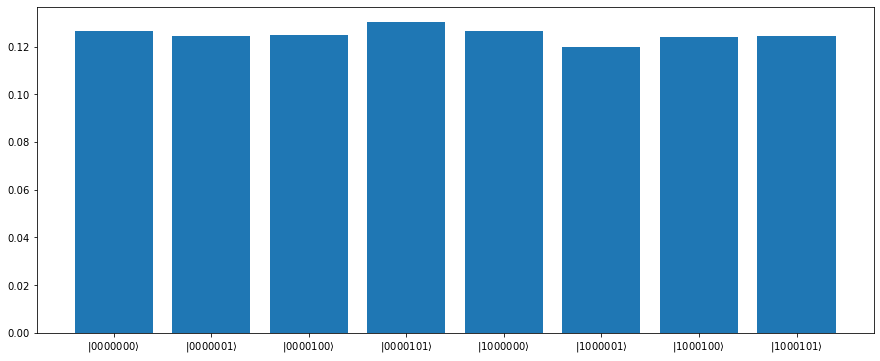

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

fname = 'TestCircuit3.txt'
circ = circuit(fname)
states = [('$|{0:0>' + str(int(circ.Nqubits)) + r'b}\rangle$').format(x) for x in range(2**circ.Nqubits)]
counts = np.zeros(2**circ.Nqubits)



for i in range(15000):
    circ = circuit(fname)
    circ.simulate_circuit()
    
    res = circ.measure_system()
    
    # This may be the wrong way? Could be that it has to be reversed
    counts[np.sum([res[i]*(2**i) for i in range(len(res))])] += 1


mask = np.argwhere(counts==0)
counts = np.delete(counts, mask)
states = np.delete(states, mask)
x = np.arange(len(states))        

plt.figure(figsize=(15, 6))
plt.bar(x, counts/np.sum(counts))
plt.xticks(x, states, fontsize=10)
plt.show()

#### Qiskit benchmark

In [18]:
qc = QuantumCircuit(circ.Nqubits)
for gate in circ.gates:
    if gate[0] == 'H':
        qc.h(gate[1])
    elif gate[0] == 'S':
        qc.s(gate[1])
    elif gate[0] == 'CX':
            qc.cx(gate[1], gate[2])

qc.draw()


┌───┐┌───┐          ┌───┐
q_0: ─────┤ X ├┤ H ├───────■──┤ H ├
          └─┬─┘├───┤       │  └───┘
q_1: ───────┼──┤ X ├───────┼───────
     ┌───┐  │  └─┬─┘┌───┐  │       
q_2: ┤ H ├──■────┼──┤ S ├──┼───────
     ├───┤       │  └───┘  │       
q_3: ┤ S ├───────■─────────┼───────
     ├───┤┌───┐┌───┐┌───┐  │       
q_4: ┤ S ├┤ X ├┤ S ├┤ S ├──┼───────
     └───┘└─┬─┘└───┘└───┘  │       
q_5: ───────┼──────────────┼───────
            │            ┌─┴─┐     
q_6: ───────■────────────┤ X ├─────
                         └───┘

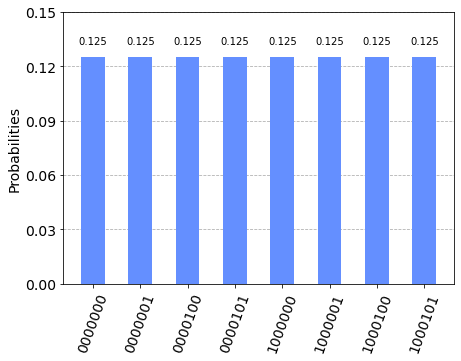

In [19]:
# Let's get the result:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
result = svsim.run(qobj).result()

final_state = result.get_statevector()
#print(final_state)
plot_histogram(result.get_counts())